In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

plt.rcParams['figure.figsize'] = [10, 5]

In [93]:


hud = pd.read_csv('LIHTCPUB.CSV',encoding = "ISO-8859-1")

hud['co_add'] = hud['co_add'].str.lower()
hud['co_cty'] = hud['co_cty'].str.lower()
hud['co_st'] = hud['co_st'].str.lower()

print(hud.columns.values)

['hud_id' 'project' 'proj_add' 'proj_cty' 'proj_st' 'proj_zip' 'state_id'
 'contact' 'company' 'co_add' 'co_cty' 'co_st' 'co_zip' 'co_tel'
 'latitude' 'longitude' 'place1990' 'place2000' 'place2010' 'fips1990'
 'fips2000' 'fips2010' 'scattered_site_cd' 'resyndication_cd' 'allocamt'
 'n_units' 'li_units' 'n_0br' 'n_1br' 'n_2br' 'n_3br' 'n_4br' 'inc_ceil'
 'low_ceil' 'ceilunit' 'yr_pis' 'yr_alloc' 'non_prof' 'basis' 'bond'
 'mff_ra' 'fmha_514' 'fmha_515' 'fmha_538' 'home' 'home_amt' 'tcap'
 'tcap_amt' 'cdbg' 'cdbg_amt' 'htf' 'htf_amt' 'fha' 'hopevi' 'hpvi_amt'
 'tcep' 'tcep_amt' 'rad' 'qozf' 'qozf_amt' 'rentassist' 'trgt_pop'
 'trgt_fam' 'trgt_eld' 'trgt_dis' 'trgt_hml' 'trgt_other' 'trgt_spc'
 'type' 'credit' 'n_unitsr' 'li_unitr' 'metro' 'dda' 'qct' 'nonprog'
 'nlm_reason' 'nlm_spc' 'datanote' 'record_stat']


/Users/paulrice/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning:

Columns (77) have mixed types.Specify dtype option on import or set low_memory=False.



In [94]:
hud.dtypes.head(20)

hud_id        object
project       object
proj_add      object
proj_cty      object
proj_st       object
proj_zip      object
state_id      object
contact       object
company       object
co_add        object
co_cty        object
co_st         object
co_zip        object
co_tel        object
latitude     float64
longitude    float64
place1990    float64
place2000    float64
place2010    float64
fips1990      object
dtype: object

In [95]:
hud['yr_pis'].value_counts()

8888    3471
2007    1726
2005    1714
2006    1707
2011    1676
2004    1667
1988    1666
2003    1661
1995    1645
1999    1617
1989    1607
2012    1555
2001    1518
2008    1513
1996    1497
2002    1469
1994    1462
1993    1431
2000    1429
1997    1419
1991    1410
1998    1389
1992    1365
1990    1309
2013    1263
2009    1218
2010    1216
2016    1092
2015    1053
2014    1013
2017     825
1987     753
9999     624
2018     573
2019     111
2020       8
Name: yr_pis, dtype: int64

In [96]:
hud[hud['yr_pis'] == 2018]['allocamt'].sum()

709916278.0

In [97]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [98]:
type_dict = {1 : 'construction', 2 : 'acquisition rehab', 3: 'both', 4 : 'existing'}
credit_dict = {1 : '30%', 2 : '70%', 3 : 'both', 4 : 'TCEP only'}

In [99]:
hud = hud[hud['company'].notnull()]
hud = hud[hud['co_add'].notnull()]
hud = hud[hud['proj_zip'].notnull()]
hud['project'] = hud['project'].str.lower()
hud['credits_per_unit'] = hud['allocamt'] / hud['li_units']
hud['total_bedrooms'] = hud['n_0br'] + hud['n_1br'] + hud['n_2br'] + hud['n_4br']
hud['proj_zip'] = hud['proj_zip'].str.split('-').str.get(0)
hud['type_str'] = hud['type'].map(type_dict)
hud['credit_str'] = hud['credit'].map(credit_dict)

In [100]:
hud[(hud['yr_alloc'] > 2010) & 
    (hud['yr_alloc'] != 8888) & 
    (hud['yr_alloc'] != 9999) &     
    (hud['credit'] == 1)].groupby(['yr_alloc'])['allocamt'].sum().head(40)



yr_alloc
2011   200616400.100
2012   186639536.000
2013   231713963.000
2014   330891900.000
2015   344985885.000
2016   231487382.000
2017    99745674.000
2018    48231907.000
2019     5033456.000
Name: allocamt, dtype: float64

In [101]:
hud['credits_per_unit'].median()

6594.682926829269

In [102]:
# hotness = pd.read_csv('RDC_MarketHotness_Monthly_Zip.csv')
# hotness['ZipCode'] = hotness['ZipCode'].astype(int).astype(str)

In [104]:
housing = pd.read_csv('RDC_Inventory_Hotness_Metrics_Zip_History.csv')
housing = housing[housing['month_date_yyyymm'] == 202009]
housing['state'] = housing['zip_name'].str.split(',').str.get(1)
housing['postal_code'] = housing['postal_code'].astype(int).astype(str)
print(housing.shape)

(12769, 24)


In [105]:
recent_hud = hud[(hud['yr_alloc'] > 2015) & 
                 (hud['yr_alloc'] < 2022)]

In [106]:
recent_hud.shape

(1414, 84)

In [107]:
recent_hud = pd.merge(recent_hud, housing, left_on = 'proj_zip', right_on='postal_code', how='left')

hud = pd.merge(hud, housing, left_on = 'proj_zip', right_on='postal_code', how='left')

In [108]:
recent_hud.columns.values

array(['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'contact', 'company', 'co_add', 'co_cty', 'co_st',
       'co_zip', 'co_tel', 'latitude', 'longitude', 'place1990',
       'place2000', 'place2010', 'fips1990', 'fips2000', 'fips2010',
       'scattered_site_cd', 'resyndication_cd', 'allocamt', 'n_units',
       'li_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br',
       'inc_ceil', 'low_ceil', 'ceilunit', 'yr_pis', 'yr_alloc',
       'non_prof', 'basis', 'bond', 'mff_ra', 'fmha_514', 'fmha_515',
       'fmha_538', 'home', 'home_amt', 'tcap', 'tcap_amt', 'cdbg',
       'cdbg_amt', 'htf', 'htf_amt', 'fha', 'hopevi', 'hpvi_amt', 'tcep',
       'tcep_amt', 'rad', 'qozf', 'qozf_amt', 'rentassist', 'trgt_pop',
       'trgt_fam', 'trgt_eld', 'trgt_dis', 'trgt_hml', 'trgt_other',
       'trgt_spc', 'type', 'credit', 'n_unitsr', 'li_unitr', 'metro',
       'dda', 'qct', 'nonprog', 'nlm_reason', 'nlm_spc', 'datanote',
       'record_stat', 'credits

In [109]:
fig = px.scatter(recent_hud[(recent_hud['yr_alloc'] > 2015) & 
                            (recent_hud['credits_per_unit'] < 500000)], x="median_listing_price", y="credits_per_unit", hover_name='zip_name',hover_data=['company','contact', 'proj_add','proj_cty','co_add','co_cty', 'n_units'])
fig.show()

In [110]:
terry = hud[hud['yr_alloc'] > 2018]

print(terry['co_add'].value_counts().head(40))

7700 trenholm road                  24
9711 washington blvd - ste 200      18
2964 peachtree rd nw ste 640        18
1020 w montrose ave                 13
5 powell ln                         12
95 berkeley st ste 500              10
150 federal st ste 5                 9
6 faneuil hall marketplace           8
2010 quarrier st                     8
p.o. box 556                         8
8975 guilford rd ste 100             7
60 columbus circle                   7
3111 paces mill road suite a-250     7
77 park st                           7
2605 maitland ctr pky ste a          7
3104 breard st                       6
1100 new jersey ave se, ste 1000     6
40 ct st floor 8                     6
1718 peachtree st nw ste 684         6
260 peachtree st ste 1800            5
4814 outlook dr ste 201              5
1301 n 31st st                       5
329 commercial dr ste 110            5
40 ct st ste 650                     5
10220 old columbia road, ste. m      4
191 peachtree st ne ste 4

In [111]:
print(recent_hud.groupby(['type_str','credit_str'])['credits_per_unit'].quantile([.25,.5,.75]))

type_str           credit_str       
acquisition rehab  30%         0.250    3257.969
                               0.500    5012.385
                               0.750    7790.800
                   70%         0.250    9161.000
                               0.500   12291.667
                               0.750   18000.000
                   TCEP only   0.250         inf
                               0.500         inf
                               0.750         inf
                   both        0.250    4561.236
                               0.500    7857.583
                               0.750   13494.300
both               30%         0.250    4513.782
                               0.500    7015.857
                               0.750    9924.989
                   70%         0.250    7692.308
                               0.500   12980.000
                               0.750   22261.700
                   both        0.250    9880.502
                               0

In [112]:
hud[hud['project'].str.contains("a-mill")]['median_listing_price']

17310   352500.000
Name: median_listing_price, dtype: float64

In [113]:
dominium = hud[(hud['co_add'].str.contains("2905 NORTHWEST BLVD SUITE 150")) |
                (hud['company'].str.contains('MARK SWEEN')) | 
                (hud['contact'].str.contains('DOMINIUM')) | 
                (hud['company'].str.contains('PAUL SWEEN')) |
                (hud['contact'].str.contains('ARMAND BRACHMAN')) | 
                (hud['contact'].str.contains('MARK MOORHOUSE')) | 
                (hud['contact'].str.contains('SUE KOCH'))]

In [114]:
dominium['co_add'].value_counts().head(20)

2905 nw blvd ste 150                   19
2905 northwest blvd suite 150          15
2355 polaris ln n ste 100              13
2001 west blue heron boulevard          3
2905 northwest boulevard, suite 150     2
2905 northwest blvd ste 150             2
510 s neil st                           1
19105 w capitol dr                      1
2905 n+k2west blvd ste 150              1
2905 northwest blvd ste150              1
2905 northwest blvd., suite 150         1
Name: co_add, dtype: int64

In [115]:
dominium.columns.values

array(['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'contact', 'company', 'co_add', 'co_cty', 'co_st',
       'co_zip', 'co_tel', 'latitude', 'longitude', 'place1990',
       'place2000', 'place2010', 'fips1990', 'fips2000', 'fips2010',
       'scattered_site_cd', 'resyndication_cd', 'allocamt', 'n_units',
       'li_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br',
       'inc_ceil', 'low_ceil', 'ceilunit', 'yr_pis', 'yr_alloc',
       'non_prof', 'basis', 'bond', 'mff_ra', 'fmha_514', 'fmha_515',
       'fmha_538', 'home', 'home_amt', 'tcap', 'tcap_amt', 'cdbg',
       'cdbg_amt', 'htf', 'htf_amt', 'fha', 'hopevi', 'hpvi_amt', 'tcep',
       'tcep_amt', 'rad', 'qozf', 'qozf_amt', 'rentassist', 'trgt_pop',
       'trgt_fam', 'trgt_eld', 'trgt_dis', 'trgt_hml', 'trgt_other',
       'trgt_spc', 'type', 'credit', 'n_unitsr', 'li_unitr', 'metro',
       'dda', 'qct', 'nonprog', 'nlm_reason', 'nlm_spc', 'datanote',
       'record_stat', 'credits

,project,credits_per_unit,allocamt,li_units,n_units,demand_score,median_listing_price,hotness_rank,type,trgt_fam,trgt_eld,trgt_other,trgt_spc,metro
16852,charter oaks,nan,nan,33.000,33.000,88.457,164550.000,675.000,1.000,nan,nan,nan,NaN,1.000
16879,summit on second,nan,nan,47.000,48.000,88.457,164550.000,675.000,2.000,nan,nan,nan,NaN,1.000
32222,village of kaufman,266.309,18109.000,68.000,68.000,90.584,217050.000,908.000,nan,nan,nan,nan,NaN,1.000
1405,cholla ranch,nan,nan,125.000,140.000,80.144,287500.000,1161.000,nan,nan,nan,nan,NaN,1.000
16978,chowen bend townhomes,11249.938,359998.000,32.000,32.000,67.717,272550.000,1495.000,2.000,1.000,0.000,0.000,NaN,1.000
8465,dawnville meadows,nan,nan,96.000,120.000,82.623,205750.000,1565.000,1.000,2.000,2.000,2.000,NaN,1.000
16800,park edge apts,nan,nan,50.000,51.000,64.237,282500.000,1936.000,2.000,nan,nan,nan,NaN,1.000
17151,river north,5037.293,841228.000,167.000,167.000,63.244,272450.000,2026.000,1.000,nan,1.000,nan,NaN,1.000
17313,maryland park apartments,4071.581,700312.000,172.000,172.000,57.652,212550.000,2162.000,2.000,1.000,nan,nan,NaN,1.000
1579,copper cove apts,nan,nan,226.000,228.000,83.585,280049.500,2177.000,1.000,nan,nan,nan,NaN,1.000


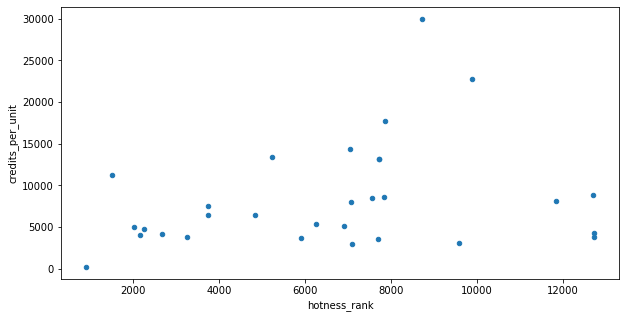

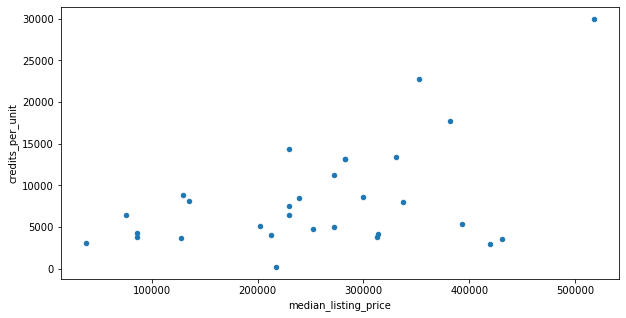

In [121]:
#Cedar Ridge Apartments
#Millworks lofts

dominium.plot.scatter('hotness_rank','credits_per_unit')
dominium.plot.scatter('median_listing_price','credits_per_unit')

dominium.sort_values('hotness_rank', ascending=True)[['project','credits_per_unit','allocamt','li_units','n_units','demand_score','median_listing_price','hotness_rank','type','trgt_fam', 'trgt_eld','trgt_other','trgt_spc','metro']]

# Allocation amount vs. num li units for 30% new construction and rehab 

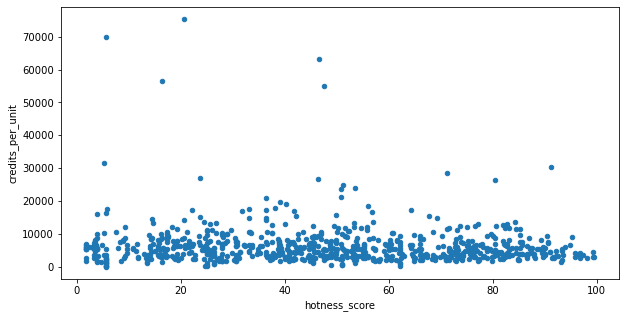

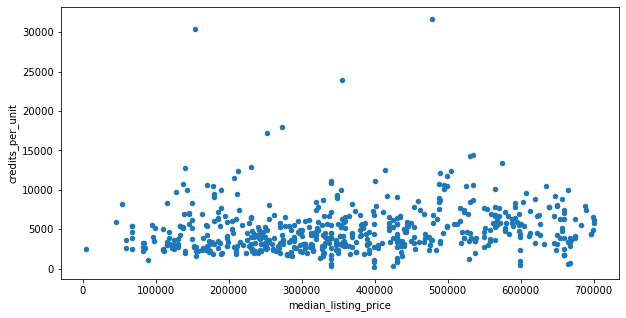

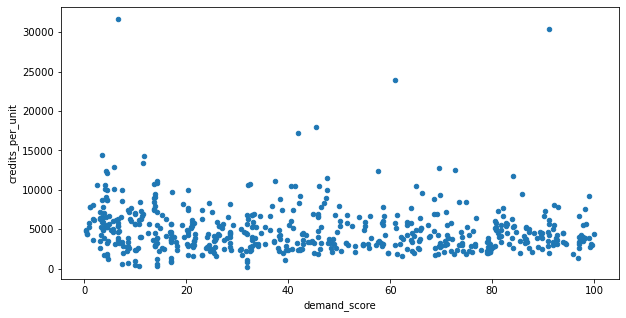

In [125]:
hud[(hud['yr_alloc'] > 2009) &
    (hud['credit'] == 1) &
    (hud['type'] == 2) & 
    (hud['allocamt'] < 4000000) & \
    (hud['li_units'] > 10) &
    (hud['allocamt'] > 0)].plot.scatter('hotness_score','credits_per_unit')

hud[(hud['yr_alloc'] > 2009) &
    (hud['credit'] == 1) &
    (hud['type'] == 2) & 
    (hud['allocamt'] < 1500000) & \
    (hud['li_units'] > 10) &
    (hud['median_listing_price'] < 700000) &
    (hud['allocamt'] > 0)].plot.scatter('median_listing_price','credits_per_unit')


hud[(hud['yr_alloc'] > 2009) &
    (hud['credit'] == 1) &
    (hud['type'] == 2) & 
    (hud['allocamt'] < 1500000) & \
    (hud['li_units'] > 10) &
    (hud['median_listing_price'] < 700000) &
    (hud['allocamt'] > 0)].plot.scatter('demand_score','credits_per_unit')




Allocation amount vs. num li units for 30% new construction and rehab 


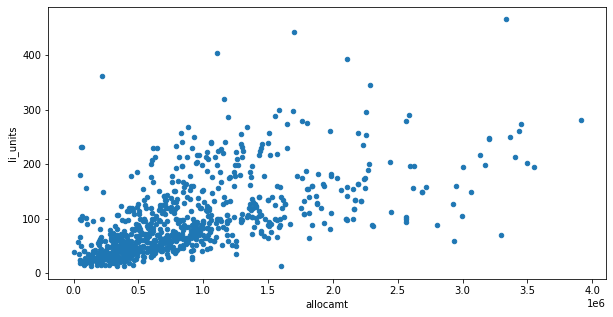

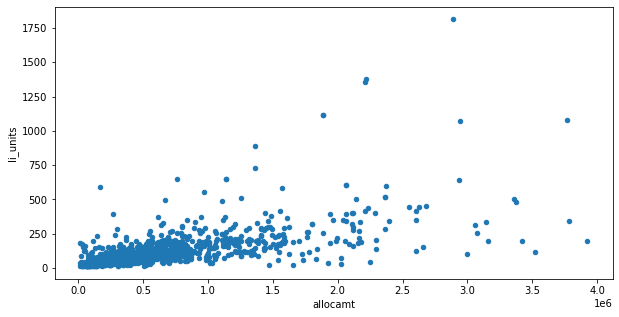

In [126]:
# credit 1 == 30%
# credit 2 == 70%
# What's the most expensive part of the process?
# type 1 == new construction
# type 2 == rehab. 

print('Allocation amount vs. num li units for 30% new construction and rehab ')
hud[(hud['yr_alloc'] > 2009) &
    (hud['credit'] == 1) &
    (hud['type'] == 1) &
    (hud['allocamt'] < 4000000) & \
    (hud['li_units'] > 10) &
    (hud['allocamt'] > 0)].plot.scatter('allocamt','li_units')


hud[(hud['yr_alloc'] > 2009) &
    (hud['credit'] == 1) &
    (hud['type'] == 2) &
    (hud['allocamt'] < 4000000) & \
    (hud['li_units'] > 10) &
    (hud['allocamt'] > 0)].plot.scatter('allocamt','li_units')

# Allocation amount vs. num li units for 70% new construction and rehab 

Allocation amount vs. num li units for 30% new construction and rehab 


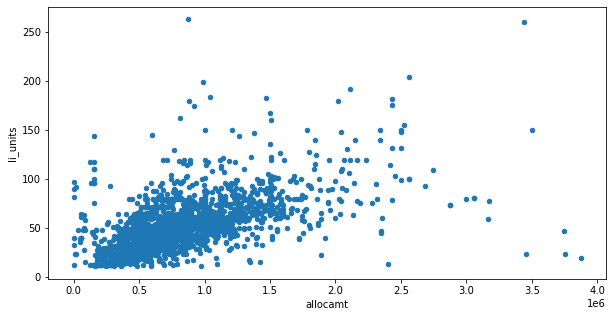

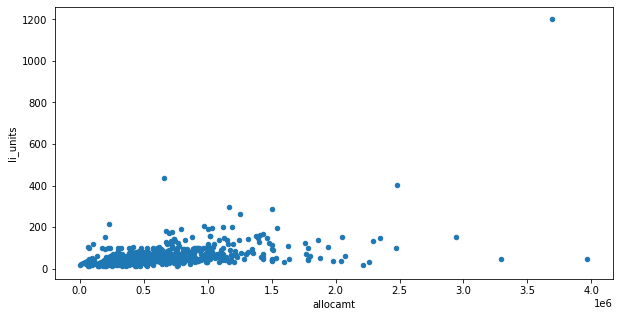

In [127]:
print('Allocation amount vs. num li units for 30% new construction and rehab ')
hud[(hud['yr_alloc'] > 2009) &
    (hud['credit'] == 2) &
    (hud['type'] == 1) &
    (hud['allocamt'] < 4000000) & \
    (hud['li_units'] > 10) &
    (hud['allocamt'] > 0)].plot.scatter('allocamt','li_units')


hud[(hud['yr_alloc'] > 2009) &
    (hud['credit'] == 2) &
    (hud['type'] == 2) &
    (hud['allocamt'] < 4000000) & \
    (hud['li_units'] > 10) &
    (hud['allocamt'] > 0)].plot.scatter('allocamt','li_units')

In [129]:
#2202 N Downing St
#https://www.monroegroup.com/
#4041 HIAWATHA AVE S well done!
#Top Deals

hud[(hud['yr_alloc'] > 2014) & \
    (hud['credit'] == 1) & \
    (hud['credits_per_unit'] > 10000) & 
    ((hud['hotness_rank'] < 3000) | (hud['median_listing_price'] > 300000)) &
    (hud['li_units'] > 10) & \
    (hud['allocamt'] > 0)].sort_values('credits_per_unit', ascending=False)[['proj_add','proj_cty','state_id','proj_zip','allocamt','li_units','n_units','yr_alloc','type_str','credits_per_unit','contact','co_add']]

,proj_add,proj_cty,state_id,proj_zip,allocamt,li_units,n_units,yr_alloc,type_str,credits_per_unit,contact,co_add
25499,205 EAST 92ND ST,NEW YORK,NY-XX-2202,10128,120000000.000,47.000,0.000,9999,construction,2553191.489,STEPHEN ROSS,60 columbus circle
25487,160 MADISON AVE,NEW YORK,NY-XX-2091,10016,30000000.000,64.000,319.000,9999,construction,468750.000,NaN,352 park avenue south
6067,5430 W. 73RD AVE,WESTMINSTER,CO-17-13,80003,13696628.000,72.000,72.000,2015,acquisition rehab,190230.944,ALAN FEINSTEIN,7490 west 45th avenue
12049,2500 WEST KILGRORE AVENUE,MUNCIE,IN-16-02400B,47304,17000000.000,119.000,119.000,2016,construction,142857.143,MARK LAUBACHER,121 west wacker drive suite 400
12048,4400 E MICHIGCAN BLVD,MICHIGAN CITY,IN-16-02500B,46360,17000000.000,119.000,119.000,2016,construction,142857.143,MARK LAUBACHER,121 west wacker drive suite 400
...,...,...,...,...,...,...,...,...,...,...,...,...
26573,899 WESTCHESTER AVENUE,BRONX,2012-055,10459,1427991.000,140.000,141.000,2017,construction,10199.936,CHARLEE RODRIGUEZ,668 crescent ave
36638,14720 NE 1ST PLACE,BELLEVUE,16-66A,98007,514984.000,51.000,52.000,2016,acquisition rehab,10097.725,NaN,1118 fifth ave
5490,555 CRESPI DRIVE,PACIFICA,CA-15-811,94044,996774.000,99.000,100.000,2015,acquisition rehab,10068.424,ALI GAYLORD,"600 california street, suite 900"
6114,4001 W 16TH AVE.,DENVER,CO-18-20,80204,492702.000,49.000,49.000,2016,acquisition rehab,10055.143,CARL KOELBEL,5291 e yale ave.


In [130]:
print('targeted family : ' + str(hud[hud['trgt_fam'] == 1]['credits_per_unit'].median())+ ', sample size : ' + str(hud[hud['trgt_fam'] == 1].shape[0]))
print('elderly : ' + str(hud[hud['trgt_eld'] == 1]['credits_per_unit'].median())+ ', sample size : ' + str(hud[hud['trgt_eld'] == 1].shape[0]))
print('disabled : ' + str(hud[hud['trgt_dis'] == 1]['credits_per_unit'].median())+ ', sample size : ' + str(hud[hud['trgt_dis'] == 1].shape[0]))
print('homeless : ' + str(hud[hud['trgt_hml'] == 1]['credits_per_unit'].median())+ ', sample size : ' + str(hud[hud['trgt_hml'] == 1].shape[0]))
print('other : ' + str(hud[hud['trgt_other'] == 1]['credits_per_unit'].median()) + ', sample size : ' + str(hud[hud['trgt_other'] == 1].shape[0]))
print('specific : ' + str(hud[hud['trgt_spc'] == 1]['credits_per_unit'].median()))

targeted family : 6981.730968468468, sample size : 13067
elderly : 6238.798936170213, sample size : 6939
disabled : 7481.9375, sample size : 3793
homeless : 11271.833333333334, sample size : 1610
other : 9510.973684210527, sample size : 2455
specific : nan


In [131]:
print('Type of construction medians')
print(hud.groupby(['type_str'])['credits_per_unit'].agg(['count','median']))
print('Type of construction medians')
print(hud.groupby(['dda'])['credits_per_unit'].agg(['count','median']))

Type of construction medians
                   count   median
type_str                         
acquisition rehab   8512 4799.565
both                 552 7537.218
construction       14741 7903.291
existing               0      nan
Type of construction medians
       count    median
dda                   
0.000   8285 11000.000
1.000   1977 11858.276
2.000    613 11345.625
3.000    161 11291.775
4.000     58  8161.851


In [132]:
hud.columns.values

array(['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'contact', 'company', 'co_add', 'co_cty', 'co_st',
       'co_zip', 'co_tel', 'latitude', 'longitude', 'place1990',
       'place2000', 'place2010', 'fips1990', 'fips2000', 'fips2010',
       'scattered_site_cd', 'resyndication_cd', 'allocamt', 'n_units',
       'li_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br',
       'inc_ceil', 'low_ceil', 'ceilunit', 'yr_pis', 'yr_alloc',
       'non_prof', 'basis', 'bond', 'mff_ra', 'fmha_514', 'fmha_515',
       'fmha_538', 'home', 'home_amt', 'tcap', 'tcap_amt', 'cdbg',
       'cdbg_amt', 'htf', 'htf_amt', 'fha', 'hopevi', 'hpvi_amt', 'tcep',
       'tcep_amt', 'rad', 'qozf', 'qozf_amt', 'rentassist', 'trgt_pop',
       'trgt_fam', 'trgt_eld', 'trgt_dis', 'trgt_hml', 'trgt_other',
       'trgt_spc', 'type', 'credit', 'n_unitsr', 'li_unitr', 'metro',
       'dda', 'qct', 'nonprog', 'nlm_reason', 'nlm_spc', 'datanote',
       'record_stat', 'credits

In [133]:
hud[hud['credit_str'] == '30%'].sort_values('allocamt', ascending=False)[['project','proj_add','proj_cty','credits_per_unit','allocamt','yr_alloc','type_str','contact','li_units']].head(100)

,project,proj_add,proj_cty,credits_per_unit,allocamt,yr_alloc,type_str,contact,li_units
25499,205 east 92nd street,205 EAST 92ND ST,NEW YORK,2553191.489,120000000.000,9999,construction,STEPHEN ROSS,47.000
23834,metropolitan gardens,325 E 7TH STREET,RENO,791566.265,65700000.000,2014,acquisition rehab,NATHAN DOLEJSI,83.000
25501,camba gardens ii,560 WINTHROP ST,BROOKLYN,137988.908,40292761.000,9999,construction,DAVID ROWE,292.000
25487,160 madison avenue apartments,160 MADISON AVE,NEW YORK,468750.000,30000000.000,9999,construction,NaN,64.000
31134,southside projects,431 DR OC KIRKLAND TER,SPARTANBURG,127547.591,29335946.000,2005,acquisition rehab,DARYL DALTON,230.000
...,...,...,...,...,...,...,...,...,...
18942,arbor park ii,5551 SHAW RD,JACKSON,58077.564,3194266.000,1996,construction,MIKE GODWIN,55.000
11164,hilliard homes,2031 S CLARK ST,CHICAGO,4872.283,3186473.000,2002,both,PETER HOLSTEN,654.000
5483,mission bay block 7,588 MISSION BAY BOULEVARD NORTH,SAN FRANCISCO,16015.429,3171055.000,2015,construction,FRANK CARDONE,198.000
26581,nycha triborough preservation,510-22 EAST 156TH STREET,BRONX,16190.195,3157088.000,2017,acquisition rehab,RONALD MOELIS,195.000


In [134]:
# The amount of the credit will be based on (i) the amount of credits awarded to the project in the competition, (ii) the actual cost of the project, (iii) the tax credit rate announced by the IRS, and (iv) the percentage of the project's units that are rented to low-income tenants.

In [135]:
housing = pd.read_csv('RDC_Inventory_Hotness_Metrics_Zip_History.csv')
housing = housing[housing['month_date_yyyymm'] == 202009]
housing['state'] = housing['zip_name'].str.split(',').str.get(1)

print(housing.shape)

/Users/paulrice/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning:

Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.



(12769, 24)


In [136]:
housing.groupby('state')['hotness_score'].median().reset_index().sort_values('hotness_score',ascending=False)

,state,hotness_score
30,nh,75.463
31,nj,71.858
39,ri,71.223
20,md,69.672
35,oh,69.211
3,az,68.965
19,ma,68.386
13,id,68.245
6,ct,65.571
15,in,65.369


In [137]:
housing.head(5)

,month_date_yyyymm,postal_code,zip_name,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_yy_day,median_dom_vs_us,ldpviews_per_property_mm,ldpviews_per_property_yy,ldpviews_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,state
0,202009,7422,"highland lakes, nj",12120.000,817.000,-518.000,9006.000,88.289,83.147,93.431,...,-44.000,-20.500,-0.075,4.183,2.307,249200.000,-0.003,0.084,0.712,nj
1,202009,28036,"davidson, nc",7317.000,2101.000,3558.000,5647.000,77.090,77.813,76.367,...,-37.500,-17.500,0.018,1.726,1.540,492050.000,-0.014,0.025,1.406,nc
2,202009,31313,"hinesville, ga",1677.000,8263.000,-1442.000,3173.000,39.098,65.465,12.732,...,-15.500,-11.000,0.038,1.467,0.470,179950.000,0.003,0.220,0.514,ga
3,202009,35801,"huntsville, al",4633.000,7066.000,1372.000,1496.000,46.094,50.129,42.058,...,-27.500,-2.500,0.032,0.641,0.892,518550.000,-0.012,0.235,1.482,al
4,202009,54889,"turtle lake, wi",16117.000,4231.000,3528.000,9601.000,62.501,95.613,29.389,...,-63.000,-32.000,0.079,2.361,0.714,232500.000,0.011,0.058,0.664,wi


In [138]:
housing.sort_values('hotness_score', ascending=False).head(20)

,month_date_yyyymm,postal_code,zip_name,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_yy_day,median_dom_vs_us,ldpviews_per_property_mm,ldpviews_per_property_yy,ldpviews_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,state
9517,202009,43068,"reynoldsburg, oh",387.000,1.000,6.000,84.000,99.949,99.961,99.937,...,-21.500,-47.000,-0.112,2.881,4.885,211500.000,-0.038,-0.036,0.604,oh
3662,202009,19047,"langhorne, pa",2549.000,2.000,349.000,1224.000,99.918,99.859,99.977,...,-41.500,-45.000,-0.160,1.750,5.387,409995.000,-0.035,-0.035,1.171,pa
11574,202009,1960,"peabody, ma",323.000,3.000,25.000,-1.000,99.855,99.906,99.804,...,-11.000,-45.500,0.019,1.300,4.303,474500.000,-0.009,-0.006,1.356,ma
9714,202009,80917,"colorado springs, co",2722.000,4.000,27.000,92.000,99.816,99.961,99.672,...,-18.000,-47.000,0.006,2.645,4.108,318550.000,-0.004,0.044,0.910,co
10746,202009,14617,"rochester, ny",4665.000,5.000,5.000,38.000,99.804,99.750,99.859,...,-17.500,-44.000,-0.157,1.904,4.422,150000.000,-0.062,0.035,0.428,ny
1641,202009,3051,"hudson, nh",4949.000,6.000,15.000,21.000,99.777,99.703,99.851,...,-16.500,-43.500,-0.030,0.748,4.422,382500.000,-0.150,0.063,1.093,nh
5696,202009,43026,"hilliard, oh",343.000,7.000,4.000,146.000,99.773,99.789,99.758,...,-25.000,-44.500,-0.125,1.352,4.185,307450.000,0.042,0.123,0.878,oh
6436,202009,14624,"rochester, ny",1848.000,8.000,-3.000,15.000,99.773,99.953,99.593,...,-17.500,-46.500,-0.224,1.436,3.990,164997.500,-0.083,0.100,0.471,ny
6775,202009,46322,"highland, in",4654.000,9.000,nan,62.000,99.758,99.750,99.765,...,-21.000,-44.000,-0.177,1.017,4.209,210050.000,0.120,0.001,0.600,in
5016,202009,18017,"bethlehem, pa",1857.000,10.000,9.000,1278.000,99.746,99.789,99.703,...,-39.500,-44.500,-0.161,2.672,4.136,300000.000,-0.077,0.090,0.857,pa


In [139]:
housing.sort_values('hotness_score', ascending=False).head(50)

,month_date_yyyymm,postal_code,zip_name,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_yy_day,median_dom_vs_us,ldpviews_per_property_mm,ldpviews_per_property_yy,ldpviews_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,state
9517,202009,43068,"reynoldsburg, oh",387.000,1.000,6.000,84.000,99.949,99.961,99.937,...,-21.500,-47.000,-0.112,2.881,4.885,211500.000,-0.038,-0.036,0.604,oh
3662,202009,19047,"langhorne, pa",2549.000,2.000,349.000,1224.000,99.918,99.859,99.977,...,-41.500,-45.000,-0.160,1.750,5.387,409995.000,-0.035,-0.035,1.171,pa
11574,202009,1960,"peabody, ma",323.000,3.000,25.000,-1.000,99.855,99.906,99.804,...,-11.000,-45.500,0.019,1.300,4.303,474500.000,-0.009,-0.006,1.356,ma
9714,202009,80917,"colorado springs, co",2722.000,4.000,27.000,92.000,99.816,99.961,99.672,...,-18.000,-47.000,0.006,2.645,4.108,318550.000,-0.004,0.044,0.910,co
10746,202009,14617,"rochester, ny",4665.000,5.000,5.000,38.000,99.804,99.750,99.859,...,-17.500,-44.000,-0.157,1.904,4.422,150000.000,-0.062,0.035,0.428,ny
1641,202009,3051,"hudson, nh",4949.000,6.000,15.000,21.000,99.777,99.703,99.851,...,-16.500,-43.500,-0.030,0.748,4.422,382500.000,-0.150,0.063,1.093,nh
5696,202009,43026,"hilliard, oh",343.000,7.000,4.000,146.000,99.773,99.789,99.758,...,-25.000,-44.500,-0.125,1.352,4.185,307450.000,0.042,0.123,0.878,oh
6436,202009,14624,"rochester, ny",1848.000,8.000,-3.000,15.000,99.773,99.953,99.593,...,-17.500,-46.500,-0.224,1.436,3.990,164997.500,-0.083,0.100,0.471,ny
6775,202009,46322,"highland, in",4654.000,9.000,nan,62.000,99.758,99.750,99.765,...,-21.000,-44.000,-0.177,1.017,4.209,210050.000,0.120,0.001,0.600,in
5016,202009,18017,"bethlehem, pa",1857.000,10.000,9.000,1278.000,99.746,99.789,99.703,...,-39.500,-44.500,-0.161,2.672,4.136,300000.000,-0.077,0.090,0.857,pa


In [140]:
#Conclusion: find good value in places with high rent and great economic presense.
#The credit claimed by a taxpayer equals a credit percentage multiplied by the project’s qualified basis. The percentage is larger for new construction or substantial rehabilitation (roughly 9 percent but specified in the law as a 70 percent present value credit) than for properties acquired for rehabilitation or for projects funded using tax-exempt bonds (roughly 4 percent but specified as a 30 percent present value credit). The qualified basis equals the fraction of the cost of the housing project rented to tenants meeting the income tests. For many LIHTC projects, the owners or developers aim to rent 100 percent of the units to qualifying tenants. State housing finance agencies may allocate enhanced tax credits to qualified projects in areas where the need is greatest for affordable rental housing.

# For example, we estimated that
# projects targeted towards predominantly low-income tenants generated
# LIHTC equity equal to about 67 percent of development cost, whereas
# mixed-income project generated LIHTC equity equal to about 50 percent
# of development cost.


In [141]:
import plotly.express as px
fig = px.scatter(housing, x="hotness_rank", y="median_listing_price", hover_name='zip_name')
fig.show()

In [142]:
housing_metro = pd.read_csv('RDC_Inventory_Hotness_Metrics_Metro_History.csv')
housing_metro = housing_metro[housing_metro['month_date_yyyymm'] == '202009']
print(housing_metro.shape)

(300, 24)


In [143]:
import plotly.express as px
fig = px.scatter(housing_metro, x="hotness_rank", y="median_listing_price", hover_name='cbsa_title')
fig.show()

In [144]:
housing_metro[housing_metro['cbsa_title'].str.contains(', mn')]

,month_date_yyyymm,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_yy_day,median_dom_vs_us,ldpviews_per_property_mm,ldpviews_per_property_yy,ldpviews_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag
39,202009,33460,"minneapolis-st. paul-bloomington, mn-wi",15.000,109.000,-11.000,6.000,58.361,87.625,29.097,...,-7.000,-18.000,-0.083,1.150,0.927,354550.000,-0.015,0.043,1.013,0.000
88,202009,40340,"rochester, mn",202.000,223.000,5.000,-72.000,30.268,15.719,44.816,...,2.000,14.000,-0.049,0.802,1.094,317450.000,-0.023,0.032,0.907,0.000
155,202009,41060,"st. cloud, mn",223.000,183.000,-29.000,-3.000,42.809,53.177,32.441,...,-8.500,-4.500,-0.144,1.129,0.955,267450.000,0.036,0.117,0.764,0.000
237,202009,20260,"duluth, mn-wi",163.000,196.000,-15.000,6.000,39.632,17.726,61.538,...,-14.000,12.000,-0.077,1.274,1.300,227000.000,-0.034,0.175,0.648,0.000


In [145]:
housing_metro.sort_values('hotness_score', ascending=False).head(20)

,month_date_yyyymm,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_yy_day,median_dom_vs_us,ldpviews_per_property_mm,ldpviews_per_property_yy,ldpviews_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag
203,202009,31700,"manchester-nashua, nh",124.000,1.000,2.000,22.000,98.495,96.990,100.000,...,-22.000,-24.000,-0.076,1.457,2.885,377300.000,-0.057,0.041,1.078,0.000
299,202009,23420,"fresno, ca",70.000,2.000,-1.000,30.000,97.826,98.328,97.324,...,-21.000,-25.500,-0.115,2.107,2.380,350050.000,0.000,0.061,1.000,0.000
67,202009,18140,"columbus, oh",31.000,3.000,3.000,2.000,97.157,95.987,98.328,...,-13.000,-22.500,-0.089,1.218,2.519,300450.000,-0.050,0.047,0.858,0.000
59,202009,39740,"reading, pa",128.000,4.000,1.000,46.000,96.488,98.328,94.649,...,-29.500,-25.500,-0.106,1.723,2.192,255050.000,-0.055,0.074,0.729,0.000
92,202009,40380,"rochester, ny",50.000,5.000,-3.000,-2.000,95.652,97.659,93.645,...,-13.500,-25.000,-0.135,1.199,2.122,222500.000,-0.092,0.067,0.636,0.000
69,202009,23060,"fort wayne, in",119.000,6.000,5.000,-5.000,95.151,94.649,95.652,...,-9.500,-21.500,0.000,1.109,2.244,220900.000,-0.052,0.139,0.631,0.000
267,202009,45820,"topeka, ks",192.000,7.000,-3.000,-3.000,94.983,96.990,92.977,...,-9.500,-24.000,-0.128,1.587,2.108,146500.000,-0.023,0.041,0.418,0.000
172,202009,15500,"burlington, nc",262.000,8.000,12.000,3.000,94.816,91.639,97.993,...,-14.500,-19.500,0.007,1.581,2.505,292984.500,0.021,0.202,0.837,0.000
55,202009,33700,"modesto, ca",116.000,9.000,3.000,16.000,94.649,92.642,96.656,...,-10.000,-20.000,0.005,2.118,2.303,424999.500,-0.000,0.133,1.214,0.000
145,202009,25860,"hickory-lenoir-morganton, nc",143.000,10.000,39.000,88.000,93.980,99.666,88.294,...,-48.000,-30.500,-0.111,1.056,1.927,294250.000,-0.019,0.090,0.841,1.000
